<a href="https://colab.research.google.com/github/pauloleao/curso-ciencia-de-dados/blob/master/Prova_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNI7
##Trabalho Final da Disciplina Aprendizado de Máquina
###Dupla : Evertonildo Maia e Paulo Alcântará
###Tuma 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

#Questão 1
Considere os dados do arquivo “ex1data1.txt”. Plote os dados em um gráfico (com a biblioteca matplotlib) colocando a primeira coluna dos dados no eixo x e a segunda coluna no eixo y.
Baseado na visualização obtida, um modelo de regressão linear seria adequado para representar esses dados?
Para este conjunto de dados, considere a primeira coluna dos dados como o único atributo dos indivíduos (X) e a segunda coluna é o rótulo dos mesmos (y).

In [ ]:
#Colocamos os arquivos nesse endereço para não precisar ficar fazendo upload
data1 = pd.read_csv('http://www.jbm-consult.com.br/storage/ex1data1.txt', header=None, names=['X','y'])
data1.head()

URLError: <urlopen error [Errno -2] Name or service not known>

Com os dados normalizados:

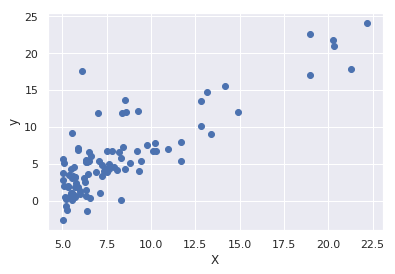

In [ ]:
list_X = pd.DataFrame(data1['X'])
list_y = pd.DataFrame(data1['y'])
plt.plot(list_X, list_y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
list_X = pd.DataFrame(data1['X'])
list_y = pd.DataFrame(data1['y'])

In [ ]:
# NORMALIZANDO OS DADOS
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(list_X)
y_Norm = MinMaxScaler().fit_transform(list_y)

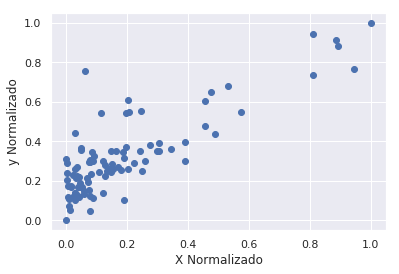

In [ ]:
plt.plot(X_Norm, y_Norm, 'bo')
plt.xlabel('X Normalizado')
plt.ylabel('y Normalizado')
plt.show()

In [ ]:
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression

In [ ]:
lr = linear_model.LinearRegression()
#lr=LinearRegression()

In [ ]:
predicted = lr.fit(X_Norm, y_Norm)
#lr.fit(X_Norm, y_Norm)
#predicted = lr.fit(X=data1['col1'].values.reshape(-1,1), y=data1['col2'])

In [ ]:
print(predicted.coef_)

[[0.7638249]]


In [ ]:
print(predicted.intercept_)

[0.17825531]


In [ ]:
lr.score(X_Norm, y_Norm)

0.7020315537841398

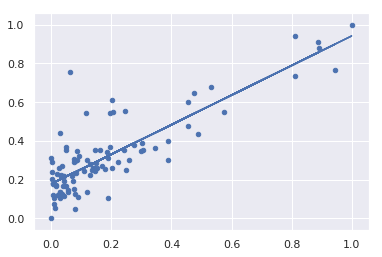

In [ ]:
plt.scatter(X_Norm, y_Norm, 20)
plt.plot(X_Norm,lr.predict(X_Norm))
plt.show()

###Resposta: Seria adequada sim uma regressão linear porque existe uma reta que  representa o conjunto de dados e pode ser usada para inferir valores preditos de y (variáve dependente) para valores de X, conforme se pode verificar no gráfico acima.  

#Questão 2
Carregue os dados contidos no arquivo “ex2data1.txt”. O arquivo contem 100 linhas e 3 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo de classificação capaz de reproduzir as classes apresentadas na terceira coluna dos dados. O problema consiste em um sistema de admissão de alunos em uma universidade. Os dados das colunas 1 e 2 representam as notas de cada aluno em dois testes. A coluna 3 indica se este aluno foi ou não admitido na universidade. Os dados apresentados são dados históricos de alunos aceitos ou não. Deseja-se fazer um sistema que faça a avaliação dos alunos automaticamente.
<br>
Apresentar:
* Figura com os dados. Para a figura, utilize um gráfico em duas dimensões, cada uma contendo uma nota, e diferenciando aprovação e reprovação pela cor dos dados no gráfico.
*   Divida o conjunto de dados entre treino e teste.
*   Utilize a Regressão Logística para efetuar a classificação nos dados de treino e calcule a acurácia (score) obtida para o conjunto de teste.



In [ ]:
data2 = pd.read_csv('http://www.jbm-consult.com.br/storage/ex2data1.txt', header = None)
data2.columns = ['Nota1', 'Nota2', 'Resultado']
data2.head()

,Nota1,Nota2,Resultado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


###Resposta: 2.1 Plotando os dados e separando por cor os aprovados e reprovados. A cor vermelha representa reprovado (col3=0) e verde aprovado (col3=1)

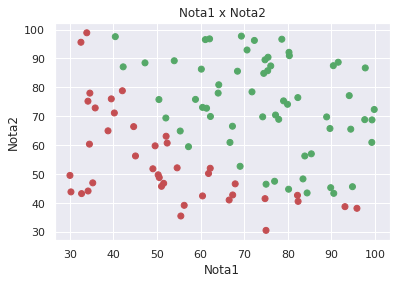

In [ ]:
colormap = np.array(['r', 'g'])
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(x=data2['Nota1'], y=data2['Nota2'], c=colormap[data2['Resultado']])
axes1.set_title('Nota1 x Nota2')
axes1.set_xlabel('Nota1')
axes1.set_ylabel('Nota2')
scatter_plot.show()

Resposta: 2.2 Dividindo o conjunto de dados entre treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data2[['Nota1', 'Nota2']]

In [ ]:
print(X.head())

       Nota1      Nota2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376


In [ ]:
y = data2['Resultado']

In [ ]:
# NORMALIZANDO OS DADOS
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
#y_Norm = MinMaxScaler().fit_transform(y)
y_Norm = y

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_Norm, y_Norm, test_size=0.3)

Resposta: 2.3 Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='lbfgs')
lr = lr.fit(X_train, y_train)

In [ ]:
print('Resultado (0 para reprovado e 1 para aprovado) ', lr.predict(X_test))

Resultado (0 para reprovado e 1 para aprovado)  [1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1]


In [ ]:
print('Calculo da Acurácia: ', lr.score(X_test, y_test))

Calculo da Acurácia:  0.8333333333333334


#Questão 3.
Carregue os dados contidos no Dataset de Câncer (breast cancer) do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador do SVM (SVC) para realizar a classificação
dos dados carregados.
- Varie o parâmetro C de 0.1 a 1 e mostre um gráfico contendo a
diferença entre os scores obtidos no conjunto de treino para cada valor
do parâmetro C.
- Varie o parâmetro C de 0.1 a 1 e mostre um gráfico contendo a
diferença entre os scores obtidos no conjunto de teste para cada valor
do parâmetro C.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de C.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

In [ ]:
# NORMALIZANDO OS DADOS
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
#y_Norm = MinMaxScaler().fit_transform(y)
y_Norm = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm,y_Norm,test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='poly',degree=2)
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
print('Acurácia Obtida', svc.score(X_test,y_test))

Acurácia Obtida 0.7602339181286549


In [ ]:
list_svc_train = []
list_svc_test = []
list_var = []
for c in np.arange(0.1,5,0.18):
    svc = SVC(kernel='poly',degree=2,C=c)
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=FutureWarning)
      svc.fit(X_train,y_train)
    list_svc_test.append(svc.score(X_test,y_test))
    list_svc_train.append(svc.score(X_train,y_train))
    list_var.append(c)

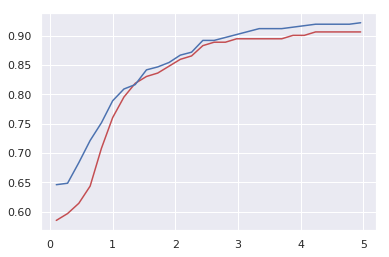

In [ ]:
plt.plot(list_var,list_svc_test,'r-')
plt.plot(list_var,list_svc_train,'b-')
plt.show()

###Resposta: A diferença apresentada é que no SVC a acurácia é maior quando testado com a base de teste. O desejado é que o score para a base de treino não seja muito superior à base de teste, o que indicaria um sobre-ajuste (overfitting). Verifica-se no gráfico também que quanto maior for o parâmetro C no SVC, maior a acurácia (para ambas as bases). Nota-se que após um determinado valor de C, a acurácia não mais tem alteração. Usamos o valor maior de C (até 5) para verificar o momento em que isso ocorre.

#Questão 4.
Carregue os dados contidos no arquivo #“fruit_data_with_colors_miss.txt”.
- Utilize a estratégia de imputar os dados faltantes utilizando a média
dos demais dados.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador do KNN para realizar a classificação dos
dados carregados, com o conjunto de atributos sendo constituído das
colunas “mass”, “width”, “height” e “color_score” e o rótulo sendo
constituído pela coluna “fruit_label”.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de treino
para cada valor do parâmetro.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de teste para
cada valor do parâmetro.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de n_neighbors.

In [ ]:
data = pd.read_table('http://www.jbm-consult.com.br/storage/fruit_data_with_colors_miss.txt',sep='\t', na_values=['?','.'])
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,NaN,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [ ]:
data = data.fillna(data.mean())
#preenche os NaN com a média de cada coluna

In [ ]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.000000,8.4,7.3,0.55
1,1,apple,granny_smith,180.000000,8.0,6.8,0.59
2,1,apple,granny_smith,176.000000,7.4,7.2,0.60
3,2,mandarin,mandarin,164.448276,6.2,4.7,0.80
4,2,mandarin,mandarin,84.000000,6.0,4.6,0.79


In [ ]:
X = data[['mass','width','height','color_score']]
y = data['fruit_label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

 Normalizando os dados:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
#y_Norm = MinMaxScaler().fit_transform(y.values.reshape(-1,1))
y_Norm = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm,y_Norm)

In [ ]:
# plotando o comportamennto do score com a variação do k testando o
# modelo com as bases de teste e treino
k_range1 = range(1,11)
list_knn_train1 = []
list_knn_test1 = []
for k in k_range1:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    list_knn_train1.append(knn.score(X_train,y_train))
    list_knn_test1.append(knn.score(X_test,y_test))
    print('Para k = ', k, 'Acurácia Treino', knn.score(X_train,y_train), 'Acurácia Teste', knn.score(X_test,y_test))


Para k =  1 Acurácia Treino 1.0 Acurácia Teste 1.0
Para k =  2 Acurácia Treino 0.9545454545454546 Acurácia Teste 0.9333333333333333
Para k =  3 Acurácia Treino 1.0 Acurácia Teste 0.9333333333333333
Para k =  4 Acurácia Treino 0.9545454545454546 Acurácia Teste 0.8666666666666667
Para k =  5 Acurácia Treino 0.9772727272727273 Acurácia Teste 0.9333333333333333
Para k =  6 Acurácia Treino 0.9772727272727273 Acurácia Teste 0.8666666666666667
Para k =  7 Acurácia Treino 0.9545454545454546 Acurácia Teste 0.9333333333333333
Para k =  8 Acurácia Treino 0.9772727272727273 Acurácia Teste 0.9333333333333333
Para k =  9 Acurácia Treino 0.9318181818181818 Acurácia Teste 0.9333333333333333
Para k =  10 Acurácia Treino 0.8636363636363636 Acurácia Teste 0.7333333333333333


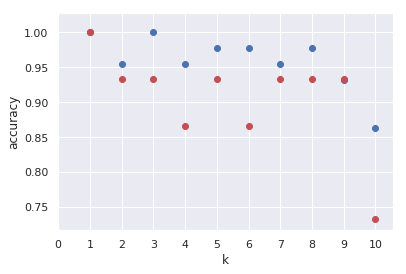

In [ ]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range1, list_knn_train1, c='b')
plt.scatter(k_range1, list_knn_test1, c='r')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.show()

###Resposta 2: Para o teste do modelo com a base de treino (azul), o melhor score foi obtido para k=5. Para a base de teste (vermelha) o melhor score foi para valores de k de 1 a 8. Para valores de k=10 está possivelmente indicado sobre-ajuste (overfitting) pois o score com a base de treino está superior ao da base de teste.

#Questão 5.
– Carregue os dados contidos no arquivo
“fruit_data_with_colors_miss.txt”.
- Utilize a estratégia de imputar os dados faltantes utilizando a média
dos demais dados.
- Utilize o PCA para diminuir a dimensionalidade dos atributos para
n_components=2
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador do KNN para realizar a classificação dos
dados carregados, com o conjunto de atributos sendo constituído pela
saída do PCA sobre as colunas “mass”, “width”, “height” e
“color_score” e o rótulo sendo constituído pela coluna “fruit_label”.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de treino
para cada valor do parâmetro.
- Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico
contendo a diferença entre os scores obtidos no conjunto de teste para
cada valor do parâmetro.
Justifique as diferenças apresentadas nos gráficos da questão anterior
em relação aos obtidos nesta questão.

In [ ]:
data = pd.read_table('http://www.jbm-consult.com.br/storage/fruit_data_with_colors_miss.txt',sep='\t', na_values=['?','.'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [ ]:
data = data.fillna(data.mean())
#preenche os NaN com a média de cada coluna

In [ ]:
X = data[['mass','width','height','color_score']]
y = data['fruit_label']
#y é o rótulo, é o que queremos predizer - variável dependente
#X são os parâmetros - independentes

In [ ]:
# Utilizando PCA

In [ ]:
# Normalizando os dados antes de aplicar o PCA
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
#y_Norm = MinMaxScaler().fit_transform(y.values.reshape(-1,1))
y_Norm = y

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
#X_transf = pca.fit_transform(X)
X_transf = pca.fit_transform(X_Norm)

In [ ]:
#print(X_transf)
#len(X_transf)
X_transf.shape
#type(X_transf)

(59, 2)

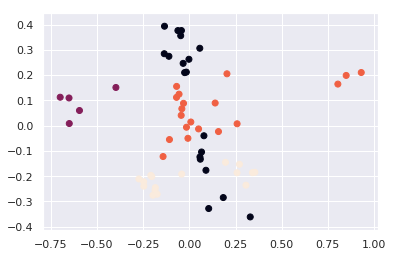

In [ ]:
plt.scatter(X_transf[:,0],X_transf[:,1],c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transf,y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# plotando o comportamennto do score com a variação do k testando o
# modelo com as bases de teste e treino
k_range = range(1,11)
list_knn_train = []
list_knn_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    list_knn_train.append(knn.score(X_train,y_train))
    list_knn_test.append(knn.score(X_test,y_test))
    print('Para k = ', k, 'Acurácia Treino', knn.score(X_train,y_train), 'Acurácia Teste', knn.score(X_test,y_test))



Para k =  1 Acurácia Treino 1.0 Acurácia Teste 0.8666666666666667
Para k =  2 Acurácia Treino 0.9545454545454546 Acurácia Teste 0.9333333333333333
Para k =  3 Acurácia Treino 0.9772727272727273 Acurácia Teste 0.8666666666666667
Para k =  4 Acurácia Treino 1.0 Acurácia Teste 0.8666666666666667
Para k =  5 Acurácia Treino 0.9318181818181818 Acurácia Teste 0.8666666666666667
Para k =  6 Acurácia Treino 0.9772727272727273 Acurácia Teste 0.8666666666666667
Para k =  7 Acurácia Treino 0.9090909090909091 Acurácia Teste 0.8666666666666667
Para k =  8 Acurácia Treino 0.9090909090909091 Acurácia Teste 0.8666666666666667
Para k =  9 Acurácia Treino 0.9090909090909091 Acurácia Teste 0.8
Para k =  10 Acurácia Treino 0.8863636363636364 Acurácia Teste 0.8666666666666667


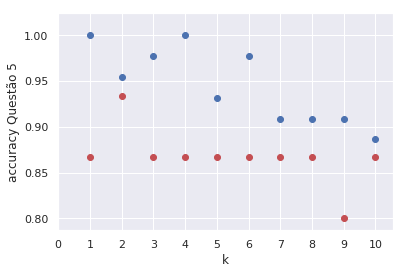

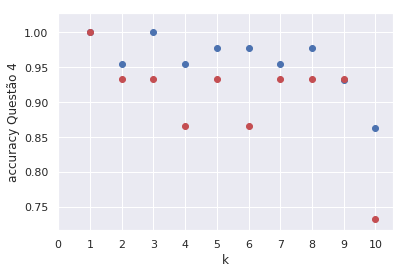

In [ ]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy Questão 5')
plt.scatter(k_range, list_knn_train, c='b')
plt.scatter(k_range, list_knn_test, c='r')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.show()

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy Questão 4')
plt.scatter(k_range1, list_knn_train1, c='b')
plt.scatter(k_range1, list_knn_test1, c='r')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.show()

###Resposta 2: Para o teste do modelo com a base de treino (azul), o melhor score foi obtido para k=1, 3 e 4. Se aumentarmos o k após 4, o score vai caindo. Para a base de teste (vermelho) o melhor score foi para k=3, 5 e 7. Para valores de k de 1 a 4, 6 e de 8 a 10 está possivelmente indicado sobre-ajuste (overfitting) pois o score com a base de treino está superior ao da base de teste. Para k=5 e 7 não há overfitting. Em relação à questão anterior, o scores da presente questão estão menores, mas de k=1 a 9 não há overfitting.

#Questão 6.
Carregue os dados contidos no Dataset de Iris do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize a Random Forest para realizar a classificação dos dados
carregados.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de <b>treino</b> para cada valor do parâmetro n_estimators.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de <b>teste</b> para cada valor do parâmetro n_estimators.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de n_estimators.
Apresente a matriz de confusão dos dados de teste.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X,y = load_iris(return_X_y=True)


In [ ]:
data = load_iris()

In [ ]:
# Normalizando os dados antes de aplicar o PCA
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
#y_Norm = MinMaxScaler().fit_transform(y.values.reshape(-1,1))
y_Norm = y
X_train, X_test, y_train, y_test = train_test_split(X_Norm,y_Norm)

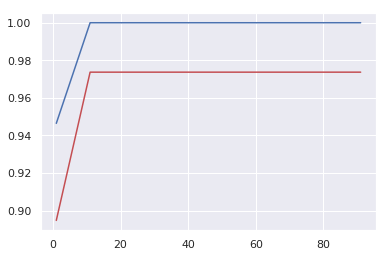

In [ ]:
list_rf_train = []
list_rf_test = []
list_rf_var = []
for c in np.arange(1,100,10):
  rf = RandomForestClassifier(n_estimators=c,max_features=None)
  rf.fit(X_train,y_train)
  list_rf_test.append(rf.score(X_test,y_test))
  list_rf_train.append(rf.score(X_train,y_train))
  list_rf_var.append(c)

plt.plot(list_rf_var,list_rf_train,'b')
plt.plot(list_rf_var,list_rf_test,'r')
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9736842105263158


In [ ]:
predictions = clf.predict(X_test)

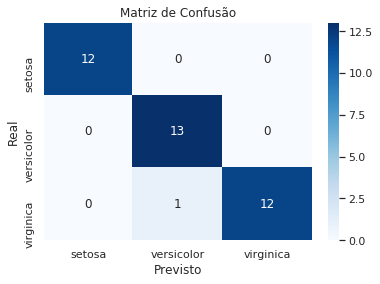

In [ ]:
mc1 = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(mc1,annot=True, cmap="Blues", fmt="d", xticklabels = ['setosa', 'versicolor', 'virginica'], yticklabels = ['setosa', 'versicolor', 'virginica'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title("Matriz de Confusão");

###Resposta: *Concluímos que, para os dados em questão, o RandomForestClassifier não se adequa, pois o aprendizado não é satisfatório.*

#Questão 7.
Carregue os dados contidos no Dataset de Iris do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize a Gradient Boosted Decision Tree
(GradientBoostingClassifier) para realizar a classificação dos dados
carregados.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de **treino** para cada valor do parâmetro n_estimators.
- Varie o parâmetro n_estimators de 1 a 100 (de 10 em 10) e mostre
um gráfico contendo a diferença entre os scores obtidos no conjunto
de **teste** para cada valor do parâmetro n_estimators.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de n_estimators.
Apresente a matriz de confusão dos dados de teste.
Compare os resultados obtidos pela Random Forest e a Gradient
Boosted Decision Tree, considerando acurácia e matriz de confusão,
e diga qual deveria ser utilizada.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

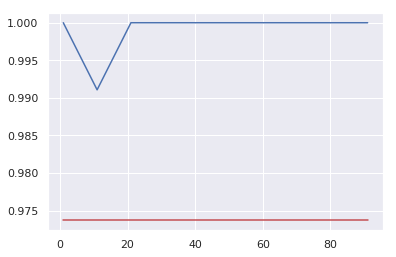

In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
list_gbc_train = []
list_gbc_test = []
list_gbc_var = []
for c in np.arange(1,100,10):
  gbc = GradientBoostingClassifier( n_estimators=c,max_features=None)
  gbc.fit(X_train,y_train)
  list_gbc_test.append(gbc.score(X_test,y_test))
  list_gbc_train.append(gbc.score(X_train,y_train))
  list_gbc_var.append(c)

plt.plot(list_gbc_var,list_gbc_test,'r-')
plt.plot(list_gbc_var,list_gbc_train,'b-')
plt.show()

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, max_features=None, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9736842105263158


In [ ]:
print(clf.feature_importances_)

[0.009437   0.0129352  0.31020321 0.66742459]


In [ ]:
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 11  1]
 [ 0  0 10]]


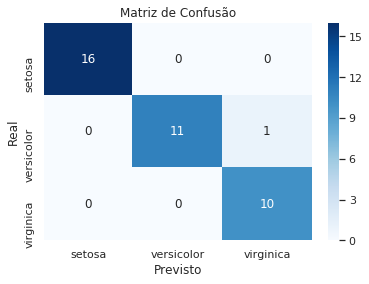

In [ ]:
mc = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(mc,annot=True, cmap="Blues", fmt="d", xticklabels = ['setosa', 'versicolor', 'virginica'], yticklabels = ['setosa', 'versicolor', 'virginica'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title("Matriz de Confusão");

###Resposta: *Comparando as duas questões, nota-se que GradientBooster é mais adequado para a base em questão.*

#Questão 8.
Carregue os dados contidos no Dataset de Iris do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador baseado em Redes Neurais (MLPClassifier)
para realizar a classificação dos dados carregados.
- Varie o parâmetro hidden_layer_sizes de 10 a 100 (de 10 em 10) e
mostre um gráfico contendo a diferença entre os scores obtidos no
conjunto de **treino** para cada valor do parâmetro.
- Varie o parâmetro hidden_layer_sizes de 10 a 100 (de 10 em 10) e
mostre um gráfico contendo a diferença entre os scores obtidos no
conjunto de **teste** para cada valor do parâmetro.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de hidden_layer_sizes.
Altere o parâmetro learning_rate para ‘adaptive’ e repita os
experimentos realizados mostrando os mesmos gráficos.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_iris

In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
list_rn_train = []
list_rn_test = []
list_rn_var = []
for c in np.arange(1,100,10):
  rn = MLPClassifier ( hidden_layer_sizes=c,activation='relu', alpha=1, )
  with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning)
      rn.fit(X_train,y_train)
  list_rn_test.append(rn.score(X_test,y_test))
  list_rn_train.append(rn.score(X_train,y_train))
  list_rn_var.append(c)



In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
list_rn_train_a = []
list_rn_test_a = []
list_rn_var_a = []
for c in np.arange(1,100,10):
  rn = MLPClassifier ( hidden_layer_sizes=c,activation='relu', alpha=1, learning_rate='adaptive')
  with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning)
      rn.fit(X_train,y_train)
  list_rn_test_a.append(rn.score(X_test,y_test))
  list_rn_train_a.append(rn.score(X_train,y_train))
  list_rn_var_a.append(c)
  print ('Para c = %s, Acurácia de teste %s e Acurácia de treino  %s' % (c, rn.score(X_test,y_test), rn.score(X_train,y_train)))

Para c = 1, Acurácia de teste 0.7105263157894737 e Acurácia de treino  0.6517857142857143
Para c = 11, Acurácia de teste 0.868421052631579 e Acurácia de treino  0.9464285714285714
Para c = 21, Acurácia de teste 0.9473684210526315 e Acurácia de treino  0.9732142857142857
Para c = 31, Acurácia de teste 0.8947368421052632 e Acurácia de treino  0.9642857142857143
Para c = 41, Acurácia de teste 0.868421052631579 e Acurácia de treino  0.9732142857142857
Para c = 51, Acurácia de teste 0.9473684210526315 e Acurácia de treino  0.9732142857142857
Para c = 61, Acurácia de teste 0.8947368421052632 e Acurácia de treino  0.9732142857142857
Para c = 71, Acurácia de teste 0.9210526315789473 e Acurácia de treino  0.9910714285714286
Para c = 81, Acurácia de teste 0.9210526315789473 e Acurácia de treino  0.9910714285714286
Para c = 91, Acurácia de teste 0.9473684210526315 e Acurácia de treino  0.9910714285714286


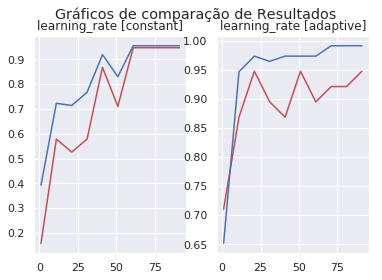

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gráficos de comparação de Resultados')

#ax1.plot(x, y)
#ax2.plot(x, -y)

ax1.set_title('learning_rate [constant]' )
ax1.plot(list_rn_var,list_rn_test,'r-')
ax1.plot(list_rn_var,list_rn_train,'b-')

#plt.subplot(1, 2, 2 )
ax2.set_title('learning_rate [adaptive]' )
ax2.plot(list_rn_var_a,list_rn_test_a,'r-')
ax2.plot(list_rn_var_a,list_rn_train_a,'b-')

#plt.show()

###Resposta: *Podemos perceber que para hidden_layer_sizes < 21, as acurácias de treino e teste são bem ruins, já para valores maiores de hidden_layer_sizes ambas as  acurácias ficam bem elevadas. Ente elas a differença é pequena, ficam alternando entre teste e treino os melhores valores*

#Questão 9.
Carregue os dados contidos no Dataset de Câncer (breast
cancer) do scikit-learn.
- Divida o conjunto de dados entre treino e teste.
- Utilize o Classificador baseado em Redes Neurais (MLPClassifier)
para realizar a classificação dos dados carregados.
- Varie o parâmetro hidden_layer_sizes para [10,10], [25,50], [50,25]
e [50,50] e mostre um gráfico contendo a diferença entre os scores
obtidos no conjunto de **treino** para cada valor do parâmetro.
- Varie o parâmetro hidden_layer_sizes para [10,10], [25,50], [50,25],
e [50,50] e mostre um gráfico contendo a diferença entre os scores
obtidos no conjunto de **teste** para cada valor do parâmetro.
Justifique as diferenças apresentadas em nos gráficos do treino e do
teste para cada valor de hidden_layer_sizes.
Altere o parâmetro alpha para 0.0001, 0.001 e 0.01 e repita os
experimentos realizados mostrando os mesmos gráficos. Justifique os
resultados obtidos.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [ ]:
data = load_breast_cancer()

In [ ]:
X,y = load_breast_cancer(return_X_y=True)
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
y_Norm = y
X_train, X_test, y_train, y_test = train_test_split(X_Norm,y_Norm)

In [ ]:
import seaborn as sns
sns.set()
#import matplotlib.pyplot as plt


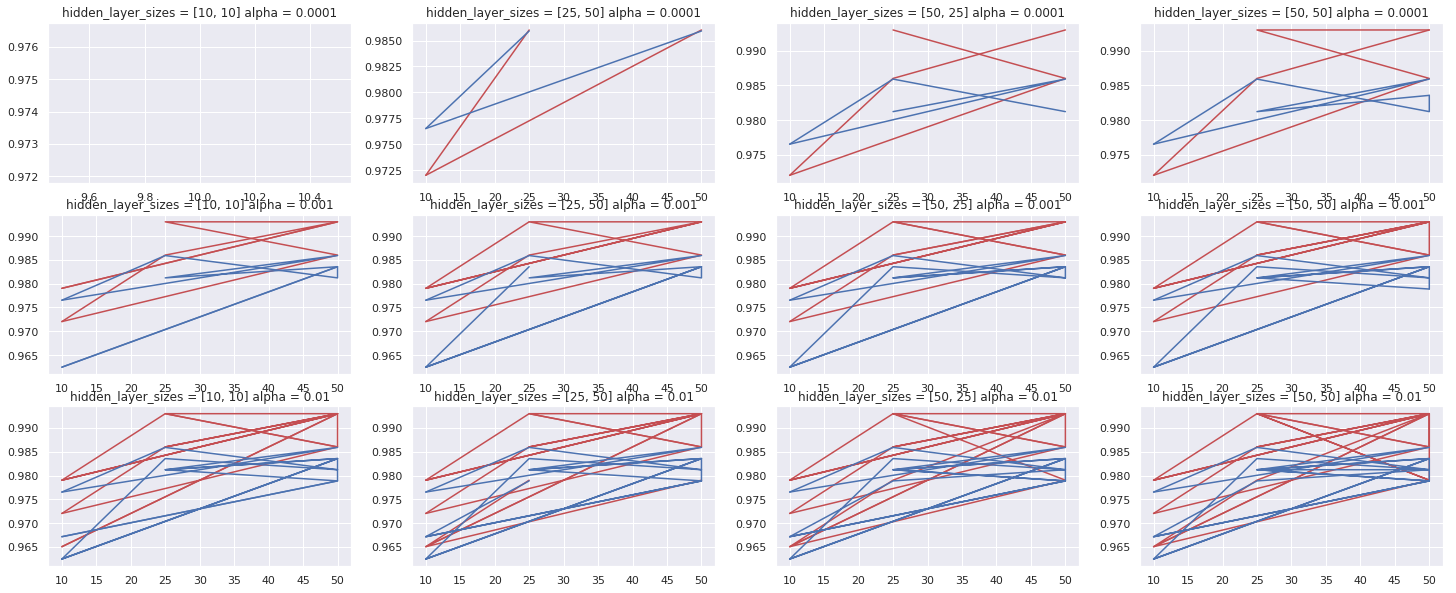

In [ ]:
list_mlp_test = []
list_mlp_train = []
list_mlp_var = []

plt.figure(figsize= (25, 10))
pos = 0
for a in [0.0001, 0.001, 0.01]:
  for c in [[10,10], [25,50], [50,25], [50, 50]]:
    #plt.figure(figsize= (20, 24))
    pos = pos + 1
    rnQ9 = MLPClassifier ( hidden_layer_sizes=c,activation='relu', alpha=a)
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning)
      rnQ9.fit(X_train,y_train)
    list_mlp_test.append(rnQ9.score(X_test,y_test))
    list_mlp_train.append(rnQ9.score(X_train,y_train))
    list_mlp_var.append(c)
    plt.subplot(3, 4, pos)
    plt.plot(list_mlp_var,list_mlp_test,'r-')
    plt.plot(list_mlp_var,list_mlp_train,'b-')

    plt.title("hidden_layer_sizes = %s alpha = %s" % (c, a));

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
#predictions = mlp.predict(X_test)
#print(confusion_matrix(y_test,predictions))

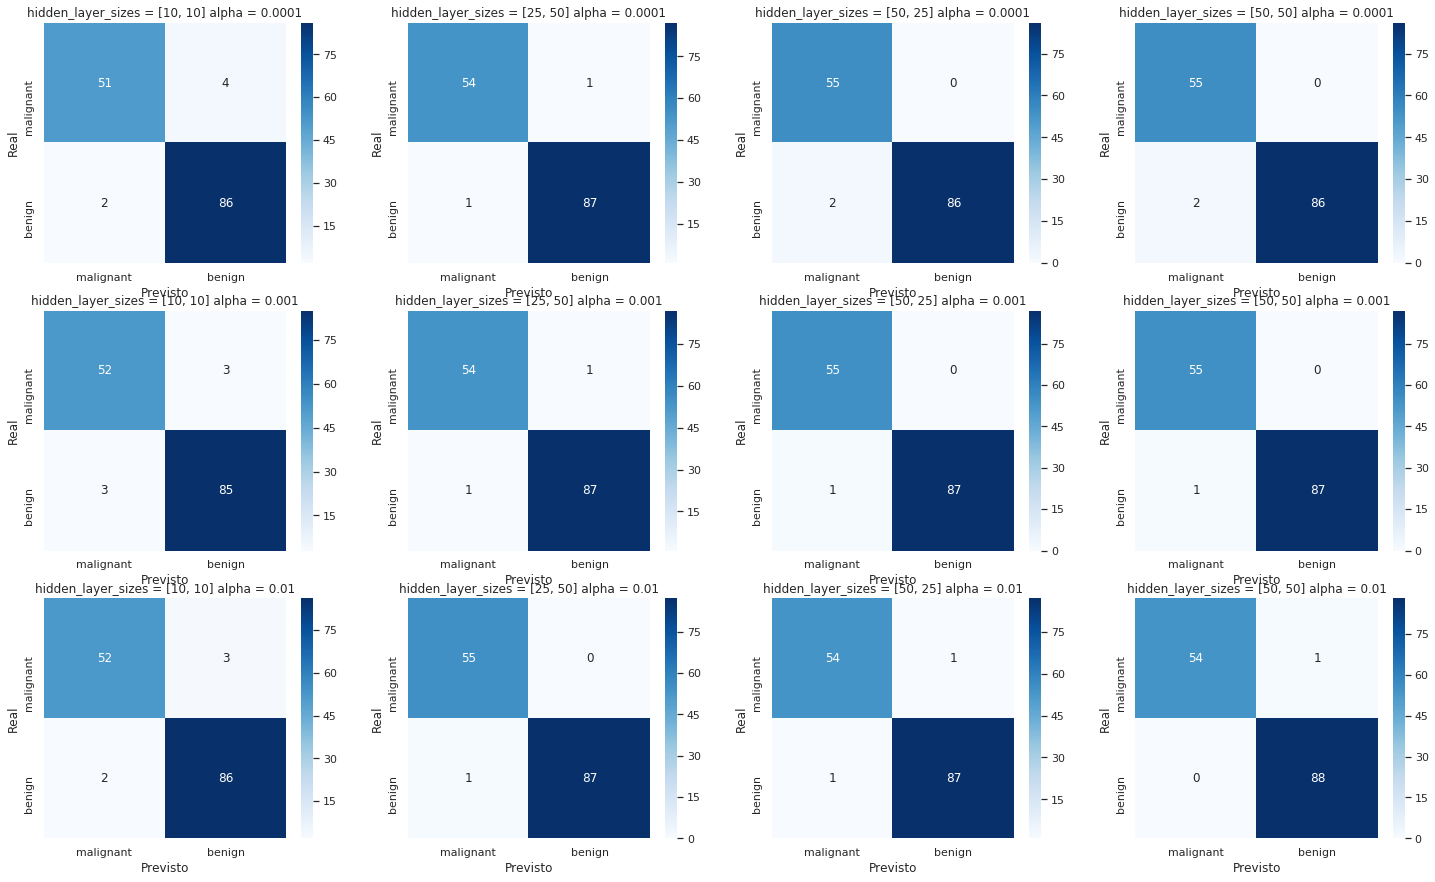

In [ ]:
plt.figure(figsize= (25, 15))
pos = 0
for a in [0.0001, 0.001, 0.01]:
  for c in [[10,10], [25,50], [50,25], [50, 50]]:
    #plt.figure(figsize= (20, 24))
    pos = pos + 1
    rnQ9 = MLPClassifier ( hidden_layer_sizes=c,activation='relu', alpha=a)
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning)
      rnQ9.fit(X_train,y_train)
    plt.subplot(3, 4, pos)
    mc = confusion_matrix(y_test,rnQ9.predict(X_test))
    sns.heatmap(mc,annot=True, cmap="Blues", fmt="d", xticklabels = ['malignant', 'benign'], yticklabels = ['malignant', 'benign' ])
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.title("hidden_layer_sizes = %s alpha = %s" % (c, a));

###Resposta:*É possível notar que a variação dos parametros, para os valores escolhidos, não causou grandes mudanças nos resultados. Isso fica mais nítido pela matriz de confusão. Verificamos que, para diminuir a chance de overfitting, devemos usar valores maiores de alpha e valores menores de hidden_layers*

#Questão 10.
Carregue os dados contidos no Dataset de Câncer (breast
cancer) do scikit-learn.
- Utilize o modelo K-means para encontrar os grupos dos dados
carregados.
- Varie o parâmetro n_clusters para 2, 5 e 10.
- Calcule a quantidade de elementos em cada cluster para cada valor
do parâmetro n_clusters. Para obter a quantidade de elementos que
ficaram no cluster i, utilize o código km.labels_[km.labels_ ==
i].shape[0], considerando que km é a variável que contém o fit sobre
o KMeans.
Baseado nos resultados das divisões dos dados entre os cluster obtidos
na etapa anterior, justifique qual valor você escolheria para n_clusters.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np

In [ ]:
predata = load_breast_cancer()
X,y = load_breast_cancer(return_X_y=True)
from sklearn.preprocessing import MinMaxScaler
X_Norm = MinMaxScaler().fit_transform(X)
#y_Norm = MinMaxScaler().fit_transform(y.values.reshape(-1,1))
y_Norm = y

In [ ]:
#data = scale(predata)
X_train, X_test, y_train, y_test = train_test_split(X,y)
#print('X_train', X_train, 'y_train', y_train, 'X_test', X_test, 'y_test', y_test)

In [ ]:
#plt.figure(figsize=(12, 12))

#n_samples = 1500
random_state = 0
#X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
for c in [2, 5, 10]:
  km = KMeans(n_clusters=c, random_state=random_state)
  predkm = km.fit_predict(X_Norm)
  #plt.scatter(X_Norm[:,0],X_Norm[:,1], label='True Position')
  #  plt.scatter(X_Norm[:,0], predkm, label='True Position')
  #plt.show()
  #print(predkm)
  print('n_clusters=', c)
  #print(km.labels_)
  for i in np.arange(0, c):
     print (' cluster %s  nº elemento %s  desvio padrão %s ' % (i, km.labels_[km.labels_ == i].shape[0], km.labels_.std(ddof=2)))
     #plt.scatter(km.labels_[:,0],km.labels_[:,1], label='True Position')



n_clusters= 2
 cluster 0  nº elemento 380  desvio padrão 0.4718185784209596 
 cluster 1  nº elemento 189  desvio padrão 0.4718185784209596 
n_clusters= 5
 cluster 0  nº elemento 209  desvio padrão 1.5095086013966985 
 cluster 1  nº elemento 149  desvio padrão 1.5095086013966985 
 cluster 2  nº elemento 37  desvio padrão 1.5095086013966985 
 cluster 3  nº elemento 78  desvio padrão 1.5095086013966985 
 cluster 4  nº elemento 96  desvio padrão 1.5095086013966985 
n_clusters= 10
 cluster 0  nº elemento 66  desvio padrão 3.097042462328315 
 cluster 1  nº elemento 126  desvio padrão 3.097042462328315 
 cluster 2  nº elemento 13  desvio padrão 3.097042462328315 
 cluster 3  nº elemento 17  desvio padrão 3.097042462328315 
 cluster 4  nº elemento 50  desvio padrão 3.097042462328315 
 cluster 5  nº elemento 69  desvio padrão 3.097042462328315 
 cluster 6  nº elemento 14  desvio padrão 3.097042462328315 
 cluster 7  nº elemento 82  desvio padrão 3.097042462328315 
 cluster 8  nº elemento 100  d

###Resposta: O numero de custers mais adequado é 2, pois o desvio padrão entre os elementos é o menor.